<a href="https://colab.research.google.com/github/G736saini/sms_project/blob/main/mlopsprojectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df =  pd.read_csv('/content/Spam_SMS.csv')

In [ ]:
df.sample(5)

,Class,Message
3034,ham,"Aight, lemme know what's up"
509,ham,What's the significance?
1396,ham,Thats cool! I am a gentleman and will treat yo...
5508,ham,God's love has no limit. God's grace has no me...
1268,ham,SERIOUSLY. TELL HER THOSE EXACT WORDS RIGHT NOW.


In [ ]:
df.shape

(5574, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['Class'] = encoder.fit_transform(df['Class'])

In [ ]:
df.head()

,Class,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

,0
Class,0
Message,0


In [ ]:
df.duplicated().sum()

np.int64(415)

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5159, 2)

In [ ]:
df.head()

,Class,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.value_counts('Class')

,count
Class,
0,4518
1,641


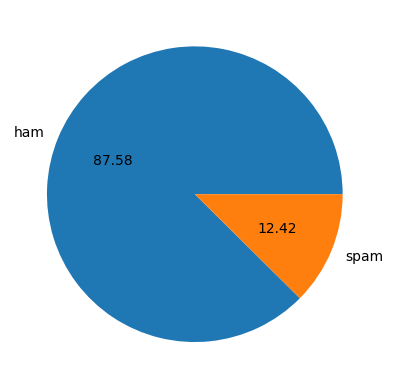

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Class'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['Message'].apply(len)

In [ ]:
df.head()

,Class,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
! pip install nltk

In [ ]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:

df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))


In [ ]:
df['num_sentencs'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Class,Message,num_characters,num_words,num_sentencs
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentencs']].describe()


,num_characters,num_words,num_sentencs
count,5159.000000,5159.000000,5159.000000
mean,79.130064,18.596821,1.970731
std,58.289063,13.406675,1.455997
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['Class'] == 0][['num_characters','num_words','num_sentencs']].describe()

,num_characters,num_words,num_sentencs
count,4518.000000,4518.000000,4518.000000
mean,70.861000,17.302125,1.827579
std,56.584513,13.592056,1.394245
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['Class'] == 1][['num_characters','num_words','num_sentencs']].describe()

,num_characters,num_words,num_sentencs
count,641.000000,641.000000,641.000000
mean,137.413417,27.722309,2.979719
std,29.998996,7.032577,1.483627
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

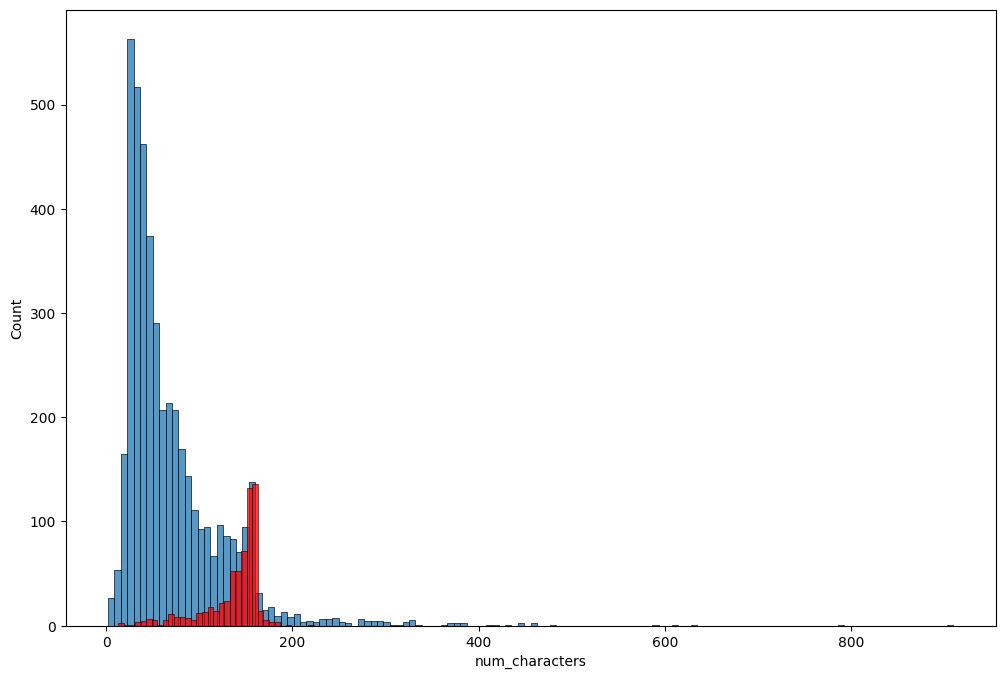

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Class'] == 0]['num_characters'])
sns.histplot(df[df['Class'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

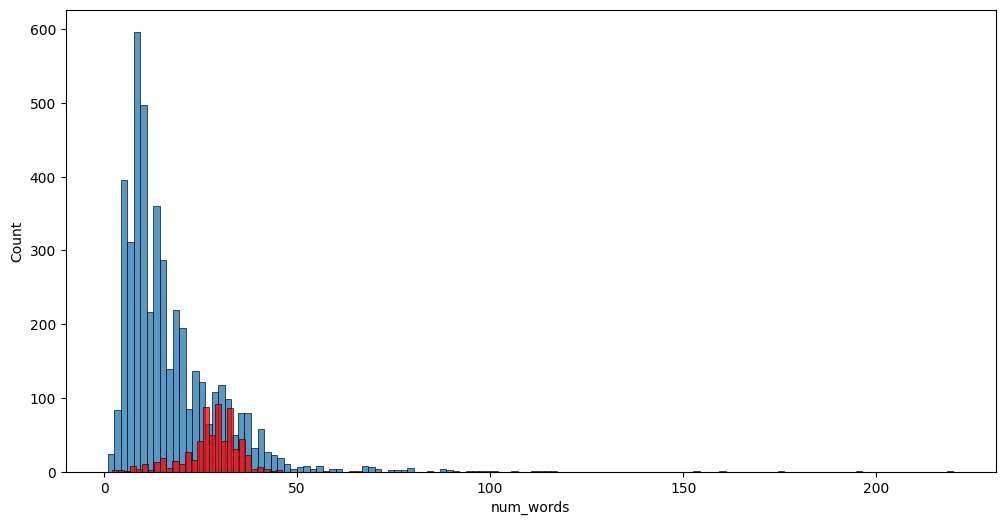

In [ ]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['num_words'])
sns.histplot(df[df['Class'] == 1]['num_words'],color='red')

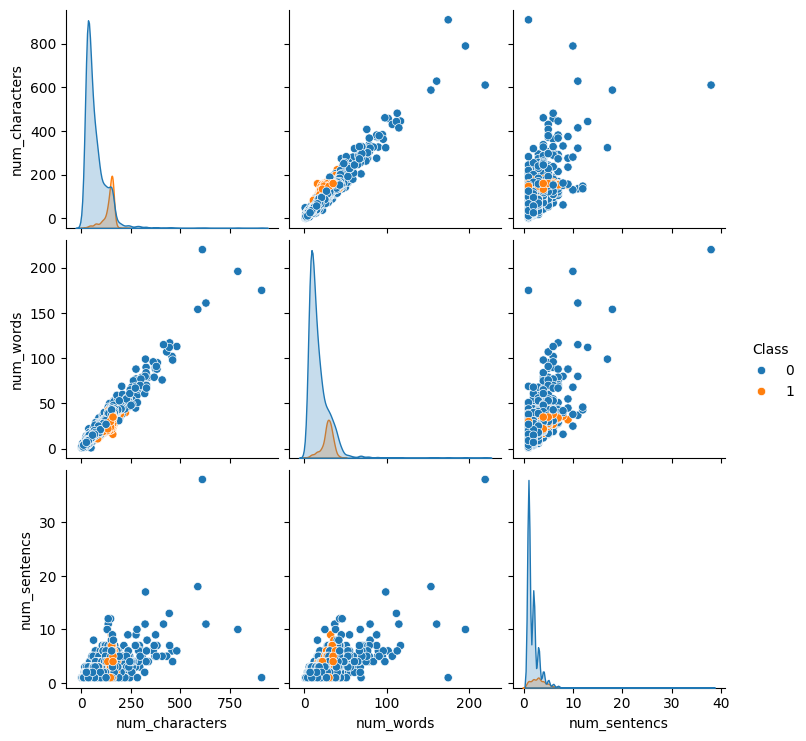

In [ ]:
sns.pairplot(df,hue='Class')

<Axes: >

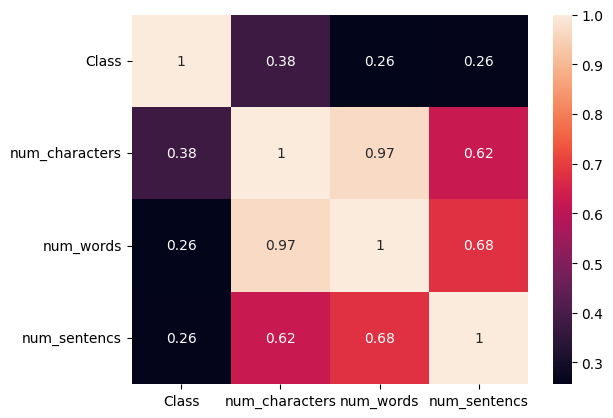

In [ ]:
sns.heatmap(df[df.select_dtypes(include=np.number).columns].corr(),annot = True)

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english')and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... ")

'go jurong point crazi avail bugi n great world la e buffet'

In [ ]:
df['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [ ]:
df.head()

,Class,Message,num_characters,num_words,num_sentencs,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['Class']==1]['transformed_text'].str.cat(sep = " "))

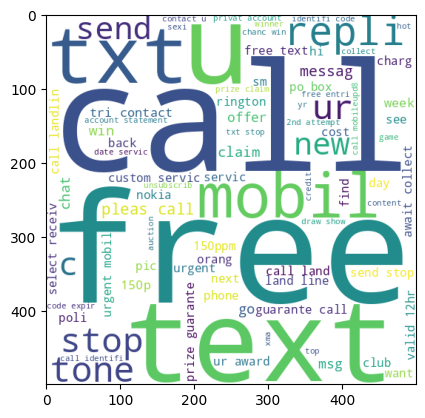

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['Class']==0]['transformed_text'].str.cat(sep = " "))

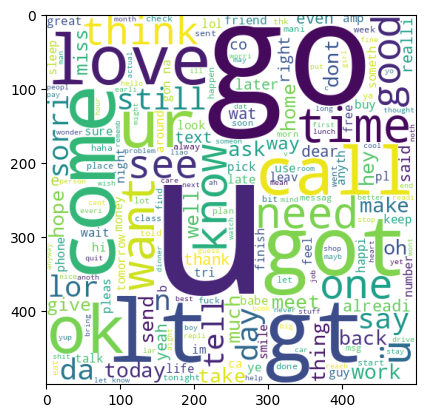

In [ ]:
plt.imshow(ham_wc)

In [ ]:
df.head()

,Class,Message,num_characters,num_words,num_sentencs,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['Class']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9792

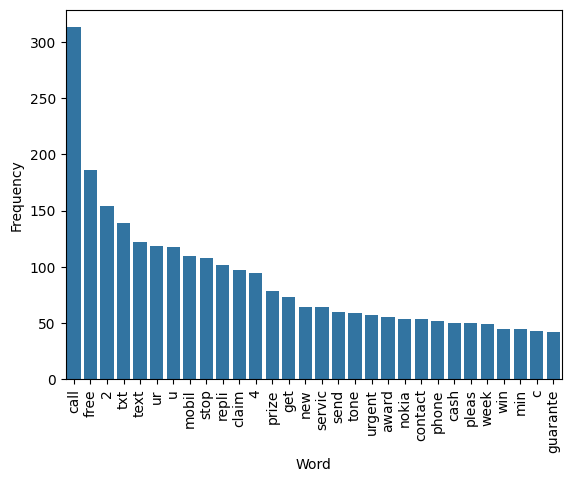

In [ ]:
from collections import Counter

spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=spam_corpus_df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['Class']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35953

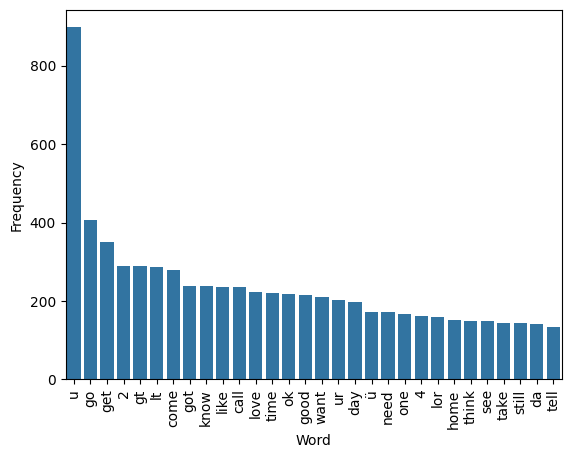

In [ ]:
from collections import Counter

ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=ham_corpus_df)
plt.xticks(rotation='vertical')
plt.show()

4 Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
x.shape

(5159, 6789)

In [ ]:
y = df['Class'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8711240310077519
[[789 120]
 [ 13 110]]
0.4782608695652174


In [ ]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777131782945736
[[898  11]
 [ 12 111]]
0.9098360655737705


In [ ]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9699612403100775
[[904   5]
 [ 26  97]]
0.9509803921568627


In [ ]:
## tfidf ---> MNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [ ]:
clfs = { 'SVC': svc, 'KN': knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc, 'GBDT': gbdt, 'xgb': xgb}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9670542635658915, 0.8869565217391304)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
  print(" For",name)
  print("Accuracy is",current_accuracy)
  print("Precision is",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

 For SVC
Accuracy is 0.9670542635658915
Precision is 0.8869565217391304
 For KN
Accuracy is 0.9108527131782945
Precision is 1.0
 For NB
Accuracy is 0.9777131782945736
Precision is 0.9098360655737705
 For DT
Accuracy is 0.936046511627907
Precision is 0.9130434782608695
 For LR
Accuracy is 0.9748062015503876
Precision is 0.9801980198019802
 For RF
Accuracy is 0.9670542635658915
Precision is 1.0
 For AdaBoost
Accuracy is 0.936046511627907
Precision is 0.9384615384615385
 For BgC
Accuracy is 0.9554263565891473
Precision is 0.8888888888888888
 For ETC
Accuracy is 0.9728682170542635
Precision is 1.0
 For GBDT
Accuracy is 0.9505813953488372
Precision is 0.9285714285714286
 For xgb
Accuracy is 0.9728682170542635
Precision is 0.9357798165137615


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.910853,1.000000
8,ETC,0.972868,1.000000
5,RF,0.967054,1.000000
4,LR,0.974806,0.980198
6,AdaBoost,0.936047,0.938462
10,xgb,0.972868,0.935780
9,GBDT,0.950581,0.928571
3,DT,0.936047,0.913043
2,NB,0.977713,0.909836
7,BgC,0.955426,0.888889


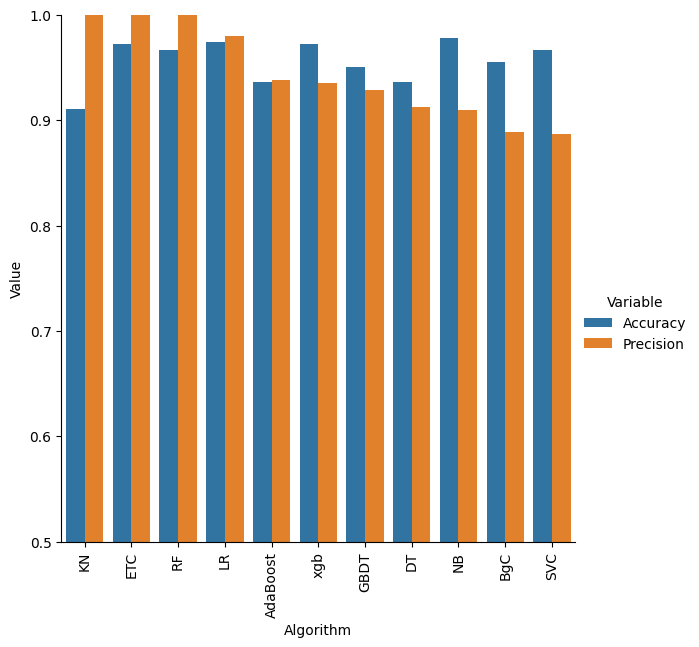

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df = pd.melt(performance_df, id_vars = "Algorithm", var_name = "Variable", value_name = "Value")
sns.catplot(x='Algorithm',y='Value',hue = 'Variable',data=performance_df,kind='bar',height=6)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. change the max_features parameter of Tfidf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
performance_df.merge(temp_df,on = 'Algorithm')

,Algorithm,Variable,Value,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,Accuracy,0.910853,0.910853,1.000000
1,ETC,Accuracy,0.972868,0.972868,1.000000
2,RF,Accuracy,0.967054,0.967054,1.000000
3,LR,Accuracy,0.974806,0.974806,0.980198
4,AdaBoost,Accuracy,0.936047,0.936047,0.938462
5,xgb,Accuracy,0.972868,0.972868,0.935780
6,GBDT,Accuracy,0.950581,0.950581,0.928571
7,DT,Accuracy,0.936047,0.936047,0.913043
8,NB,Accuracy,0.977713,0.977713,0.909836
9,BgC,Accuracy,0.955426,0.955426,0.888889


In [ ]:
# voting classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [ ]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9844961240310077
Precision 0.9819819819819819


In [ ]:
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [ ]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
#

Accuracy 0.9825581395348837
Precision 0.9565217391304348


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))